# Telecom Churn Case Study 

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the necessary packages

# model_selection.train_test_split
from sklearn.model_selection import train_test_split
# preprocessing.MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# under/over sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA, IncrementalPCA

# Metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss

# pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# Cross validation
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Boosting algorithms
from sklearn.ensemble import GradientBoostingClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import plotly.offline as py
import plotly.graph_objs as go

In [4]:
# Code to display maximum rows and columns 

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
# Importing the dataset and assigning it to churn dataframe (ch_df)

ch_df = pd.read_csv('telecom_churn_data.csv')
ch_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
ch_df.shape

(99999, 226)

In [7]:
ch_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### Check for repetitive 'Prospect ID'

In [8]:
sum(ch_df.duplicated(['mobile_number'])==True)

0

In [9]:
# Percentage of null values in each columns 

round(100*ch_df.isnull().sum()/len(ch_df),2).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [10]:
# Classifying columns

id_cols = ['mobile_number','circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [11]:
col2drop = id_cols + date_cols
col2drop

['mobile_number',
 'circle_id',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [12]:
# Percentage of null values in each date columns 

round(100*ch_df[date_cols].isnull().sum()/len(ch_df),2).sort_values(ascending = False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
last_date_of_month_7         0.60
last_date_of_month_6         0.00
dtype: float64

#### Comment:
##### Since 'date_of_last_rech_data_ ' column has more than 70% of null values, all the other '..rech_data_..' related columns having null values indicate that the customer has not done the data recharge and hence the null values can be imputed with 0 for other columns with '..rech_data_..' 

In [13]:
rech_data_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
                 'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']

In [14]:
# Imputing null values with 0 for columns without data recharge

ch_df[rech_data_cols] = ch_df[rech_data_cols].apply(lambda x: x.fillna(0))

In [15]:
# Rechecking the percentage of null values in columns with '..rech_data_..' 

round(100*ch_df[rech_data_cols].isnull().sum()/len(ch_df),2).sort_values(ascending = False)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [16]:
# Handling missing values in 'cat_cols', missing values are classified as '-1'

ch_df[cat_cols] = ch_df[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
# Appending the col2drop with columns having missing value percentage of more than 70%

[col2drop.append(i) for i in ch_df.columns if ch_df[i].isnull().sum()/len(ch_df) > 0.7 and i not in date_cols]
col2drop

['mobile_number',
 'circle_id',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [18]:
# Dropping col2drop columns from ch_df dataframe

ch_df.drop(col2drop, axis = 1, inplace = True)
ch_df.shape

(99999, 196)

In [19]:
# Rechecking the percentage of null values in columns 

round(100*ch_df.isnull().sum()/len(ch_df),2).sort_values(ascending = False)

std_ic_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
isd_og_mou_9          7.75
spl_og_mou_9          7.75
og_others_9           7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
loc_ic_mou_9          7.75
std_ic_t2m_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_ic_t2o_mou_9      7.75
std_ic_mou_9          7.75
loc_og_t2m_mou_9      7.75
std_og_t2c_mou_9      7.75
roam_og_mou_9         7.75
ic_others_9           7.75
onnet_mou_9           7.75
roam_ic_mou_9         7.75
isd_ic_mou_9          7.75
offnet_mou_9          7.75
spl_og_mou_8          5.38
std_og_t2c_mou_8      5.38
og_others_8           5.38
std_og_t2m_mou_8      5.38
loc_ic_mou_8          5.38
std_og_t2f_mou_8      5.38
loc_ic_t2f_mou_8      5.38
onnet_mou_8           5.38
l

In [20]:
ch_df.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         98981.0         98981.0         98981.0  99999.000000   
mean              0.0             0.0             0.0    282.987358   
std               0.0             0.0             0.0    328.439770   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.411500   
50%               0.0             0.0             0.0    197.704000   
75%               0.0             0.0             0.0    371.060000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
mean     278.536648    279.154731    261.645069    132.395875    133.670805   
std      338.156291    344.474791    341.998630    297.207406    308.794148   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%       86.980500     84.126000     62.685000      7.380000      6.660000   
50%      191.640000    192.080000    176.849000     34.310000     32.330000   
75%      365.344500    369.370500    353.466500    118.740000    115.595000   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000   
mean     133.018098    130.302327    197.935577    197.045133    196.574803   
std      308.951589    308.477668    316.851613    325.862803    327.170662   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.460000      5.330000     34.730000     32.190000     31.630000   
50%       32.360000     29.840000     96.310000     91.735000     92.140000   
75%      115.860000    112.130000    231.860000    226.815000    228.260000   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  92254.000000   96062.000000   96140.000000   94621.000000   
mean     190.337222       9.950013       7.149898       7.292981   
std      319.396092      72.825411      73.447948      68.402466   
min        0.000000       0.000000       0.000000       0.000000   
25%       27.130000       0.000000       0.000000       0.000000   
50%       87.290000       0.000000       0.000000       0.000000   
75%      220.505000       0.000000       0.000000       0.000000   
max    10310.760000   13724.380000   15371.040000   13095.360000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   92254.000000   96062.000000   96140.000000   94621.000000   
mean        6.343841      13.911337       9.818732       9.971890   
std        57.137537      71.443196      58.455762      64.713221   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      8464.030000    3775.110000    2812.040000    5337.040000   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   92254.000000      96062.000000      96140.000000      94621.000000   
mean        8.555519         47.100763         46.473010         45.887806   
std        58.438186        150.856393        155.318705        151.184830   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.630000          1.600000   
50%         0.000000         11.910000         11.610000         11.730000   
75%         0.000000         40.960000         39.910000         40.110000   
max      4428.460000       6431.330000       7400.660000      10752.560000   

     

#### Comments: 
###### Columns with unilateral values can be dropped

In [21]:
# Identifying columns with unilateral values to drop

col2drop = []
col2drop = [i for i in ch_df.columns if ch_df[i].nunique()==1]
ch_df.drop(col2drop, axis = 1, inplace = True)
ch_df.shape

(99999, 185)

In [22]:
# Rechecking the percentage of null values in columns 

round(100*ch_df.isnull().sum()/len(ch_df),2).sort_values(ascending = False)

loc_ic_mou_9          7.75
loc_og_mou_9          7.75
std_ic_t2t_mou_9      7.75
loc_og_t2m_mou_9      7.75
loc_ic_t2t_mou_9      7.75
spl_ic_mou_9          7.75
std_ic_t2f_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
std_ic_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
og_others_9           7.75
std_ic_mou_9          7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
spl_og_mou_9          7.75
loc_og_t2t_mou_9      7.75
isd_og_mou_9          7.75
roam_og_mou_9         7.75
roam_ic_mou_9         7.75
loc_ic_t2f_mou_9      7.75
onnet_mou_9           7.75
offnet_mou_9          7.75
isd_ic_mou_9          7.75
ic_others_9           7.75
std_og_mou_8          5.38
std_ic_t2f_mou_8      5.38
ic_others_8           5.38
loc_ic_mou_8          5.38
loc_ic_t2m_mou_8      5.38
std_og_t2f_mou_8      5.38
std_ic_mou_8          5.38
og_others_8           5.38
std_og_t2m_mou_8      5.38
onnet_mou_8           5.38
s

#### Imputing missing values with median.
Most of the columns having missing values less than 10%  have median at 0, also missing values may be because no usage. Hence, median value (i.e., 0 for most cases) imputation seems to be the most optimal.

In [23]:
# Imputing missing values with median

# ch_df[i].fillna((ch_df[i].median())) for i in ch_df.columns if round(100*ch_df[i].isnull().sum()/len(ch_df),2) > 3

for i in ch_df.columns:
    if round(100*ch_df[i].isnull().sum()/len(ch_df),2) > 3:
        ch_df[i].fillna((ch_df[i].median()), inplace=True)

In [24]:
# Rechecking the percentage of null values in columns 

round(100*ch_df.isnull().sum()/len(ch_df),2).sort_values(ascending = False)

arpu_6                0.0
total_rech_amt_9      0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
std_ic_t2m_mou_7      0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_9          0.0
isd_ic_mou_8          0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou

### Outlier detection

In [25]:
ch_df.describe(percentiles = {0.01,0.98,0.99})

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    261.645069    128.534195   
std      328.439770    338.156291    344.474791    341.998630    291.921906   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
98%     1137.079960   1149.565120   1171.041440   1132.490400   1033.112000   
99%     1410.792540   1428.685880   1455.539960   1402.445660   1410.511400   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     129.760024    127.604651    122.521442    193.934538    192.981175   
std      303.405800    301.385516    297.505381    311.179884    320.156539   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
98%     1060.340000   1046.750000   1018.998000   1125.798000   1136.202400   
99%     1463.311600   1452.734200   1398.037200   1517.047400   1524.160600   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000   99999.000000   99999.000000   
mean     190.958243    182.356135       9.558277       6.873981   
std      319.122085    308.012127      71.403643      72.029965   
min        0.000000      0.000000       0.000000       0.000000   
1%         0.000000      0.000000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
98%     1119.247200   1084.899600     118.942000      76.231200   
99%     1495.840400   1466.138400     213.813400     149.130600   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
98%        78.310800      64.110800     169.782000     119.980400   
99%       155.011600     129.811600     281.115400     215.685000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.715288         45.127633   
std        62.989180      56.176090        148.015207        152.440265   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000         11.910000         11.610000   
98%       120.480400      94.781200        333.332400        327.183200   
99%       214.512600     180.130000        537.691800        526.647400   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          44.050781         42.003441         91.282541         89.430290   
std          147.264936        142.427498        159.867997        154.7352

#### Observations: 
##### - The difference between 98th and 99th percentile or between minimum and 1st percentile is not so significant.
##### - While the difference between the 99th percentile value and maximum value is large enough to consider those values lying above 99th percentile can be considered as outliers.  

In [26]:
ch_df.shape

(99999, 185)

In [27]:
# Capping the outliers at lower limit of 1% and upper limit of 99% 

num_cols = [i for i in ch_df.columns if i not in cat_cols]

def cap_data(df):
    for col in num_cols:
        percentiles = df[col].quantile([0.01,0.99]).values
        df[col][df[col] <= percentiles[0]] = percentiles[0]
        df[col][df[col] >= percentiles[1]] = percentiles[1]
    return df

final_df=cap_data(ch_df)
final_df.shape

(99999, 185)

In [28]:
final_df.describe(percentiles = {0.98,0.99})

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     276.861621    272.404218    272.780276    255.443769    121.463652   
std      268.727549    270.990963    275.651867    271.204837    235.068252   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
98%     1137.079960   1149.565120   1171.041440   1132.490400   1033.112000   
99%     1410.789071   1428.682078   1455.519419   1402.427373   1410.510028   
max     1410.792540   1428.685880   1455.539960   1402.445660   1410.511400   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     122.428062    120.190750    114.842031    187.012053    185.483615   
std      243.035064    239.214637    231.818263    259.964329    263.363799   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
98%     1060.340000   1046.750000   1018.998000   1125.798000   1136.202400   
99%     1463.310032   1452.730084   1398.030144   1517.040148   1524.111012   
max     1463.311600   1452.734200   1398.037200   1517.047400   1524.160600   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000   99999.000000   99999.000000   
mean     183.499498    174.971086       7.185201       4.429771   
std      258.807567    251.986198      29.085258      19.666127   
min        0.000000      0.000000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
98%     1119.247200   1084.899600     118.942000      76.231200   
99%     1495.791008   1466.110568     213.810068     149.130012   
max     1495.840400   1466.138400     213.813400     149.130600   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        4.560585       3.654748      10.732921       7.077540   
std        20.342018      16.928585      40.068441      29.455988   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
98%        78.310800      64.110800     169.782000     119.980400   
99%       155.010032     129.810032     281.110108     215.680100   
max       155.011600     129.811600     281.115400     215.685000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        6.911013       5.480931         39.755559         38.869299   
std        29.231393      24.151724         80.317683         78.767356   
min         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000         11.910000         11.610000   
98%       120.480400      94.781200        333.332400        327.183200   
99%       214.510052     180.130000        537.690036        526.640148   
max       214.512600     180.130000        537.691800        526.647400   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          38.300570         36.458349         87.343571         85.775002   
std           76.759174         73.299320        128.214105        126.107614   
min            0.000000          0.000000          0.000000          0.000000   
50%           11.730000         11.260000         41.030000         40.430000   
98%          315.946000        304.132400        545.962000        541.543600   
99%          511.290228        489.490256        735.890076        721.560020   
max          511.301400        489.5028

There is a significant reduction in the outliers, hence can move ahead with further steps

In [29]:
# Rechecking the percentage of null values in columns 

round(100*final_df.isnull().sum()/len(final_df),2).sort_values(ascending = False)

arpu_6                0.0
total_rech_amt_9      0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
std_ic_t2m_mou_7      0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_9          0.0
isd_ic_mou_8          0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou

In [30]:
# Unilateral columns with only single value can be dropped

unival_col = [i for i in final_df.columns if final_df[i].nunique()==1 or final_df[i].max()<1]
final_df.drop(unival_col, axis=1, inplace=True)
final_df.shape

(99999, 179)

## Filtering out High Value Customers
Since 'av_rech_amt_data_*' is not specified whether it is average data recharge amount per-month or per-recharge count basis, here it is assumed that the value is per-recharge basis and calculations are done.

High value customers are filtered based on the problem statement.

In [31]:
# Month 6 and 7 are selecting since it is considered as the good phase, known from problem statement

final_df['avg_rech_amt_6_7'] = ( final_df['total_rech_amt_6']+final_df['total_rech_amt_7'] )/2
final_df[['total_rech_amt_6','total_rech_amt_7','total_rech_data_6','av_rech_amt_data_6',
          'total_rech_data_7','av_rech_amt_data_7','avg_rech_amt_6_7']].head()

total_rech_amt_6  total_rech_amt_7  total_rech_data_6  av_rech_amt_data_6  \
0             362.0               252                1.0               252.0   
1              74.0               384                0.0                 0.0   
2             168.0               315                0.0                 0.0   
3             230.0               310                0.0                 0.0   
4             196.0               350                1.0                56.0   

   total_rech_data_7  av_rech_amt_data_7  avg_rech_amt_6_7  
0                1.0               252.0             307.0  
1                1.0               154.0             229.0  
2                0.0                 0.0             241.5  
3                0.0                 0.0             270.0  
4                0.0                 0.0             273.0

#### hvc = High Value Customers

In [32]:
# Above 70th percentile of average recharge amount in good phase is considered as high value customers

q70 = final_df['avg_rech_amt_6_7'].quantile(.7)
hvc = final_df[final_df['avg_rech_amt_6_7']>=q70]
print(hvc.shape)
hvc.head()

(30011, 180)


arpu_6    arpu_7      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  1455.53996  500.000        57.84        54.68   
8    378.721   492.223   137.36200  166.787       413.69       351.03   
13   492.846   205.671   593.26000  322.732       501.76       108.39   
16   430.975   299.869   187.89400  206.490        50.51        74.01   
17   690.008    18.980    25.49900  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        29.84        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7          87.29          16.23          33.49          31.64         0.0000   
8         108.71           0.00           0.00           0.00         0.0000   
13        214.06          23.53         144.24          72.11       129.8116   
16        224.39           0.00           2.83           0.00         0.0000   
17         87.89           0.00           4.76           4.81         0.0000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             11.26   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28             39.12   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7             53.631            54.591             53.23              0.00   
8              0.000             0.000              0.00              0.00   
13             4.540             0.000             23.51              5.29   
16             0.000             4.480             10.26              4.66   
17             0.000             0.000              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79         61.84              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99        119.69            446.41   
16        315.91        215.64        205.93    

### Deriving target variable: 'churn'

In [33]:
hvc['churn'] = hvc.apply(lambda x: 1 if (x.total_og_mou_9+x.total_ic_mou_9+x.vol_2g_mb_9+x.vol_3g_mb_9 == 0) else 0, axis=1)

In [34]:
# Checking "churn" variable

hvc[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

churn  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7       1            0.00            0.00          0.0          0.0
8       0           34.91          142.18          0.0          0.0
13      0          631.86          446.09          0.0          0.0
16      0          334.56          255.74          0.0          0.0
17      0           87.13          631.08          0.0          0.0

#### Dropping the columns related to september month '_9'

In [35]:
sept_cols = [i for i in hvc.columns if '_9' in i]
print('Shape before dropping:', hvc.shape)
hvc.drop(sept_cols, axis=1, inplace=True)
print('Shape after dropping:', hvc.shape)

Shape before dropping: (30011, 181)
Shape after dropping: (30011, 137)


#### Churn Rate

In [36]:
print('Value Count of churn(1) and non-churn(0)')
print(hvc.churn.value_counts(normalize=True)*100)
print('\nChurn rate:', round(100*hvc.churn.sum()/len(hvc),2))

Value Count of churn(1) and non-churn(0)
0    91.359835
1     8.640165
Name: churn, dtype: float64

Churn rate: 8.64


In [41]:
# Dividing the dataframe into churners and non-churners dataframes

hvc_c0 = hvc[hvc['churn']==0]
hvc_c1 = hvc[hvc['churn']==1]

### Creating new features
##### 1. 'data_use_change' 
    This variable is used find the change in data usage from good phase(month 6/7) to action phase (month 8). Those customers whose data usage is in significant decreasing trend can be most likely churner. 
    '-ve- sign indicates that data usage is in decreasing trend in action phase compared to good phase, while '+ve' sign indicates that the customer is going good. 
##### 2. 'call_use_change'
     Similar to 'data_use_change' this variable assists in finding the change in call usage from good phase to action phase
##### 3. 'tendency'
     This variable is very interesting one from analysis perspective. Here we can know whether the customers offnet calls are more than onnet calls and is it progressively increasing from good phase to action phase, if yes then the customer might also tend to change the network
     '1' indicates that the customer's offnet call usage is progressively increasing over onnet calls while '0' indicates not so significant onnet-offnet call usage difference
     Good family-friends pack can be floated to draw back the customer and attract family-friends to switch to this network.

In [38]:
# Variable 1. 'data_use_change'

hvc['data_use_change'] = ((hvc.vol_3g_mb_8+hvc.vol_2g_mb_8)-(((hvc.vol_2g_mb_6+hvc.vol_3g_mb_6)+(hvc.vol_2g_mb_7+hvc.vol_3g_mb_7))/2))
hvc[['data_use_change','churn']].head()

data_use_change  churn
7             0.000      1
8          -541.505      0
13            0.020      0
16            0.000      0
17            0.000      0

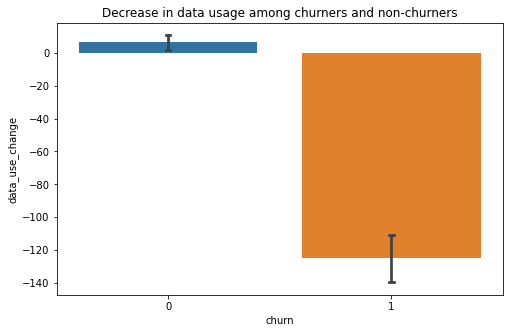

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='churn',y='data_use_change',data=hvc,capsize = 0.02)
plt.title('Decrease in data usage among churners and non-churners')
plt.show()

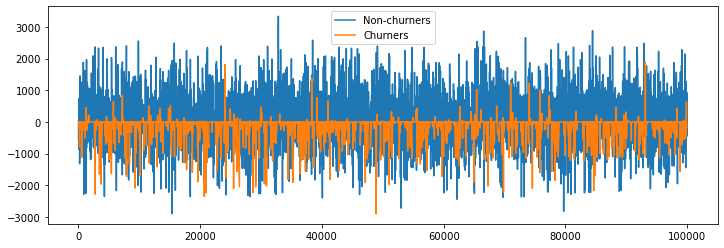

In [44]:
plt.figure(figsize=(12,4))
plt.plot(hvc_c0['data_use_change'], label='Non-churners')
plt.plot(hvc_c1['data_use_change'], label='Churners')

plt.legend(loc='best')
#plt.title('  ')
plt.show()

In [39]:
# Variable 2. 'call_use_change'

hvc['call_use_change'] = ((hvc.total_og_mou_8+hvc.total_ic_mou_8)-(((hvc.total_og_mou_6+hvc.total_ic_mou_6)+(hvc.total_og_mou_7+hvc.total_ic_mou_7))/2))
hvc[['call_use_change','churn']].head()

call_use_change  churn
7          -361.735      1
8          -348.085      0
13         1039.445      0
16         -161.780      0
17         -672.265      0

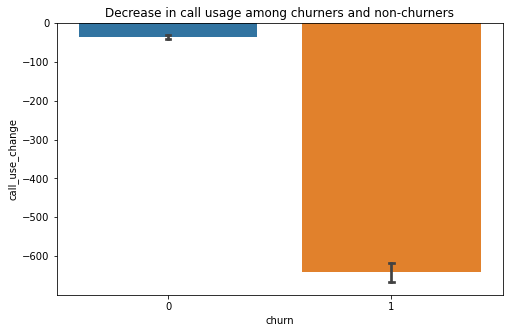

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='churn',y='call_use_change',data=hvc,capsize = 0.02)
plt.title('Decrease in call usage among churners and non-churners')
plt.show()

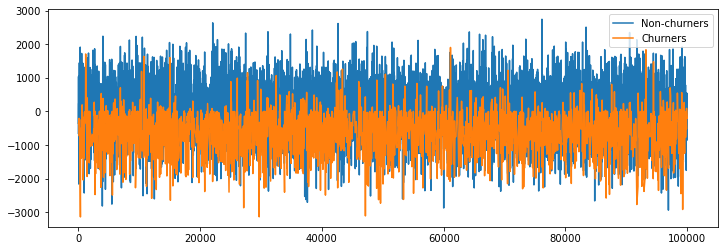

In [46]:
plt.figure(figsize=(12,4))
plt.plot(hvc_c0['call_use_change'], label='Non-churners')
plt.plot(hvc_c1['call_use_change'], label='Churners')

plt.legend(loc='best')
#plt.title('  ')
plt.show()

In [40]:
# Variable 3. 'tendency'

hvc['tendency'] = (((hvc.onnet_mou_8-hvc.offnet_mou_8)+(hvc.onnet_mou_6-hvc.offnet_mou_6)+(hvc.onnet_mou_7-hvc.offnet_mou_7))/3)
hvc[['tendency','churn']].head()

tendency  churn
7  -393.896667      1
8   162.676667      0
13   43.113333      0
16 -164.553333      0
17  378.600000      0

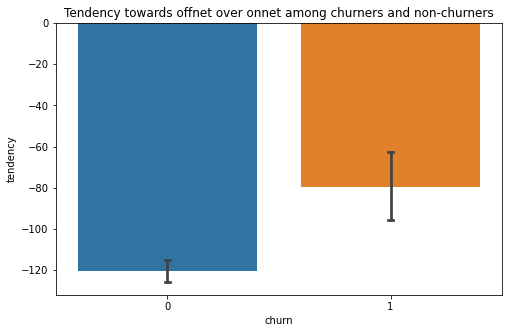

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='churn',y='tendency',data=hvc,capsize = 0.02)
plt.title('Tendency towards offnet over onnet among churners and non-churners')
plt.show()

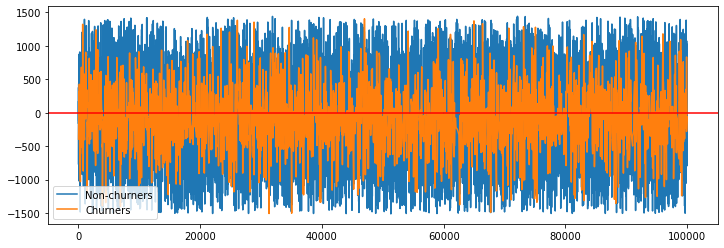

In [48]:
plt.figure(figsize=(12,4))
plt.plot(hvc_c0['tendency'], label='Non-churners')
plt.plot(hvc_c1['tendency'], label='Churners')
plt.axhline(y=0,color='r')
plt.legend(loc='best')
#plt.title('  ')
plt.show()

#### Correlation Analysis

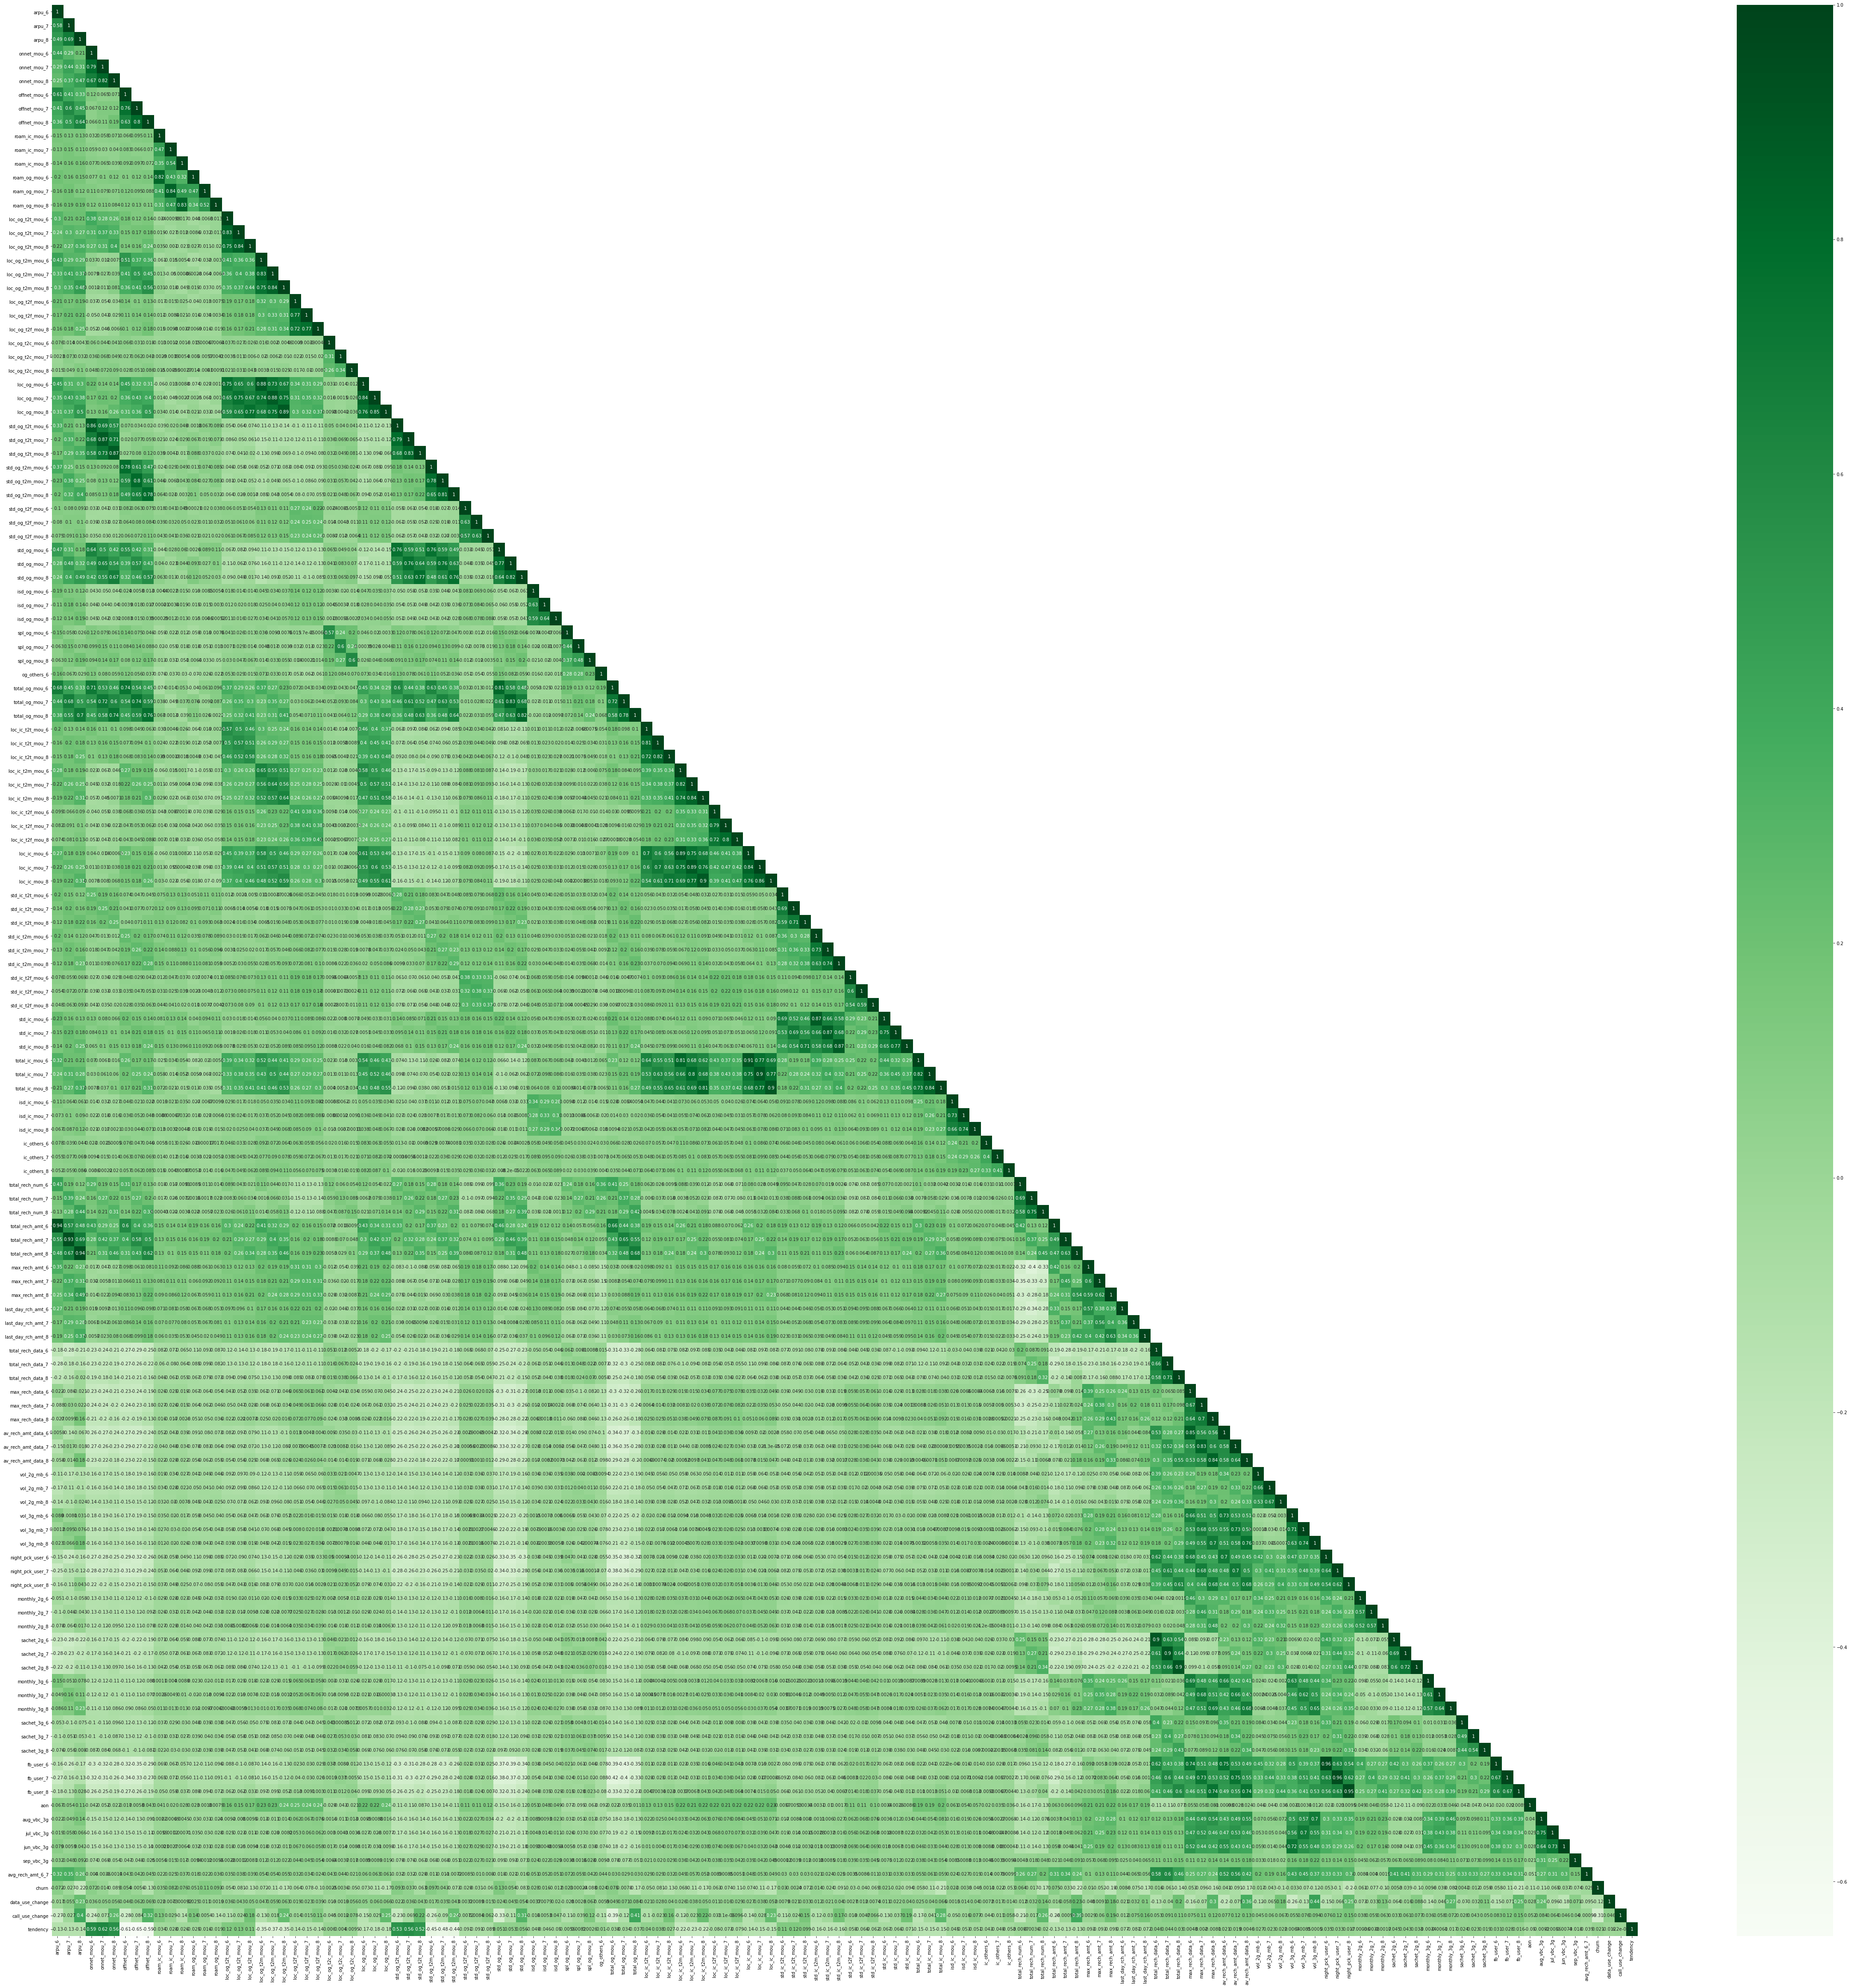

In [72]:
plt.figure(figsize=(80,80))

msk = np.array(hvc.corr())

msk[np.tril_indices_from(msk)] = False

sns.heatmap(hvc.corr(),mask=msk,annot=True,cmap='Greens')
plt.show()

In [49]:
# Create correlation matrix
corr_mat = hvc.corr().abs()

# Selecting upper triangle of correlation matrix
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
high_corr_val = [column for column in upper.columns if any(upper[column] > 0.7)]

#Dropping columns with multicollinearity greater than 0.7/70%
print('Shape before dropping:', hvc.shape)
hvc.drop(high_corr_val, axis=1, inplace=True)
print('Shape after dropping:', hvc.shape)

Shape before dropping: (30011, 140)
Shape after dropping: (30011, 65)


## Model Building

### Data preperation

#### Test-Train split

In [50]:
X = hvc.drop('churn', axis=1)
y = hvc['churn']

# Splitting the data into train and test
X_tr, X_te, y_tr, y_te  = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100, stratify=y )

In [51]:
print('Number of churners in train: ',y_tr.sum())
print('Number of churners in test: ',y_te.sum())
print('\nChurn rate for train:', round(100*y_tr.sum()/len(y_tr),2))
print('Churn rate for test:', round(100*y_te.sum()/len(y_te),2))

Number of churners in train:  1815
Number of churners in test:  778

Churn rate for train: 8.64
Churn rate for test: 8.64


In [52]:
print(X_tr.shape)
print(X_te.shape)
type(X_tr)

(21007, 64)
(9004, 64)


pandas.core.frame.DataFrame

#### Feature Scaling

In [53]:
num_cols = list(X_tr.describe().columns)

sc = StandardScaler()
X_tr[num_cols] = sc.fit_transform(X_tr[num_cols])
X_te[num_cols] = sc.transform(X_te[num_cols])
X_tr.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
76985 -0.346378 -0.899161  0.589734     0.505381     -0.543084     -0.662601   
77814  0.627962  0.951667  0.457448     3.005972     -0.634264     -0.529396   
24787 -0.330924 -0.456194 -0.187741    -0.273168     -0.404141     -0.438604   
60192  0.384592  0.158887  0.060360    -0.777030     -1.087109     -1.083366   
69896 -0.506203 -1.044741 -0.766901    -0.591854      0.514260     -0.242052   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  loc_og_t2t_mou_6  \
76985      -0.323830      -0.302222       5.130331         -0.359391   
77814      -0.323830      -0.302222      -0.302370          0.945595   
24787      -0.042888      -0.302222      -0.302370          0.760023   
60192      -0.323830      -0.302222      -0.302370         -0.666457   
69896       0.770995      -0.302222      -0.302370         -0.612802   

       loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
76985         -0.403352         -0.485205          1.637064          5.283481   
77814         -0.599177         -0.429445         -0.347358         -0.358403   
24787          0.360473         -0.381405         -0.291772          0.242150   
60192         -0.913091         -0.485205         -0.347358         -0.358403   
69896          1.630638         -0.163512         -0.347358          0.581488   

       loc_og_t2c_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
76985         -0.123220         -0.280509         -0.279645         -0.269689   
77814         -0.345828         -0.280509         -0.279645         -0.269689   
24787         -0.338490          0.030502         -0.279645         -0.269689   
60192         -0.345828         -0.280509         -0.279645         -0.269689   
69896         -0.345828         -0.280509         -0.279645         -0.269689   

       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
76985     -0.221264     -0.217112     -0.199506      1.839664      4.527323   
77814     -0.221264     -0.217112     -0.199506     -0.239349      0.076322   
24787     -0.221264     -0.217112     -0.199506     -0.477465      1.188840   
60192     -0.221264     -0.217112     -0.199506     -0.497475     -0.531044   
69896     -0.221264     -0.217112     -0.199506     -0.497475      0.190361   

       spl_og_mou_8  og_others_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
76985      0.234644    -0.406355         -0.589899         -0.758780   
77814     -0.092590     1.758854          0.321438         -0.573306   
24787     -0.441051    -0.406355          0.213032          1.004758   
60192     -0.515342    -0.406355         -0.689669         -0.899948   
69896      0.184233    -0.096054         -0.377860         -0.332208   

       loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2m_mou_6  \
76985         -0.475028          0.310364          1.242751         -0.191906   
77814         -0.439498         -0.130180         -0.097965         -0.442602   
24787         -0.207345         -0.457607         -0.456946         -0.392058   
60192         -0.475028         -0.457607         -0.456946         -0.535804   
69896         -0.429149          4.828730          4.973788          0.627304   

       std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  isd_ic_mou_6  \
76985         -0.074744         -0.307936         -0.301468     -0.284299   
77814         -0.301287         -0.307936         -0.301468     -0.284299   
24787          0.534091          0.384502          0.772340     -0.284299   
60192         -0.301287         -0.307936         -0.301468     -0.284299   
69896         -0.153405         -0.261373         -0.284845     -0.284299   

       ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
76985    -0.286029    -0.294157    -0.281437         -0.860846   
77814    -0.286029    -0.294157    -0.281437          0.946874   
24787    -0.286029    -0.294157    -0.281437         -0.989969   

### Model building without PCA

In [54]:
def build_model(x1,y1):
    x2 = sm.add_constant(x1)                                      # Adding the constant
    logm1 = sm.GLM(y1, x2, family = sm.families.Binomial()).fit() # fitting the model
    print(logm1.summary())                                           # Model summary
    return x2,logm1
       
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [55]:
def opti_cutoff(y_actual, pred_proba):
    
    # Create 'pred_df' 
    pred_df = pd.DataFrame({'actual':y_actual.values, 'predicted_prob':pred_proba})
    
    # Churn_predicted for different cutoff probabilities 
    n = [float(x)/10 for x in range(10)]
    for i in n:
        pred_df[i]= pred_df.predicted_prob.map(lambda x: 1 if x > i else 0)
   
    # Accuracy, Sensitivity and Specificity for different cutoff probabilities
    cutoff_df = pd.DataFrame( columns = ['probability_cutoff','Accuracy','Sensitivity','Specificity'])
    for i in n:
        conf_mat = confusion_matrix(pred_df.actual, pred_df[i] )
        total = sum(sum(conf_mat))
        accuracy = (conf_mat[0,0]+conf_mat[1,1])/total
        specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
        sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
        cutoff_df.loc[int(i*10)] =[ i ,accuracy,sensitivity,specificity]
    print(cutoff_df)
    
    # Plot of Accuracy, Sensitivity and Specificity for different cutoff probabilities
    fig = plt.figure(figsize=[12,8])
    cutoff_df.plot.line(x='probability_cutoff', y=['Accuracy','Sensitivity','Specificity'])
    plt.xticks(np.linspace(0,1,21).round(4),fontsize=10,rotation = 50)
    plt.grid(axis = 'x')
    plt.show()
    
    return pred_df

In [56]:
def model_report(y_actual, y_predicted):
    
    # Confusion matrix 
    confusion = confusion_matrix(y_actual, y_predicted)
    print('confusion matrix: \n',confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Accuracy score of the model: (Not suitable in case of imbalanced dataset, accuracy gives higher weightage to majority class)
    print("\nAccuracy = " , round(accuracy_score(y_actual, y_predicted)*100,4))
    print('Accuracy is indicating the ratio of correct predictions to the total number of predictions')
    
    # Sensitivity of the model:
    print('\nSensitivity:   ', round(100*TP / float(TP+FN),4))
    print('Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases')

    # Specificity of the model:
    print('\nSpecificity:   ', round(100*TN / float(TN+FP),4))
    print('Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases')

    # Precision is a good measure to determine accuracy of the model, when the costs of False Positive is high 
    # (i.e., prediction of positives should be as accurate as possible). Preferably helpful in case of imbalanced data as well.
    # Example: Email spam detection - you don't want a non-spam email be detected as spam which leads to missing important mail.
    print("\nPrecision = " ,round(precision_score(y_actual, y_predicted)*100,4))
    
    #Recall is a metric used to select our best model when there is a high cost associated with False Negative
    # Best metric when the costs of False Negative is high (i.e., prediction of positives should be as accurate as possible)
    # Example:  Fraud detection or sick patient detection - you don't want a sick patient to be detected as not sick.
    print("Recall = " ,round(recall_score(y_actual, y_predicted)*100,4))
    
    # F1-score gives a balance between precision and recall, suitable for imbalanced class datasets
    print("F1 Score = " ,round(f1_score(y_actual, y_predicted)*100,4))
    print('\nAll metrics measured in terms of %')
    pass

In [57]:
def fn_roc_curve(y_actual, pred_proba):
    
    fpr, tpr, thresholds = roc_curve(y_actual,  pred_proba, drop_intermediate = False)
    auc_score = roc_auc_score( y_actual, pred_proba )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='Area under ROC curve AUC score = %0.4f' % (100*auc_score) )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC curve)')
    plt.legend(loc="lower right")
    plt.show()
    
    pass

#### Feature elimination, to reduce the significant variables to 10

In [58]:
# Creating an object for logistic regression

logreg = LogisticRegression(class_weight='balanced')   # // class_weight='balanced' \\ is to handle class imbalance in the dataset

In [59]:
# Using RFE to reduce the significant variables to 10

rfe = RFE(logreg, 10)            
rfe = rfe.fit(X_tr, y_tr)

# Assigning RFE supported columns to new dataframe

col = X_tr.columns[rfe.support_]
X_tr_rfe = X_tr[col]

#### Assessing the model with StatsModels

In [60]:
X_tr_rfe_const,logm1 = build_model(X_tr_rfe, y_tr)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4417.6
Date:                Wed, 01 Dec 2021   Deviance:                       8835.1
Time:                        21:00:48   Pearson chi2:                 3.66e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5827      0

In [61]:
checkVIF(X_tr_rfe_const)

Features   VIF
1               arpu_6  1.92
3         offnet_mou_6  1.64
2          onnet_mou_6  1.37
10     call_use_change  1.21
4     loc_ic_t2m_mou_6  1.16
5   last_day_rch_amt_8  1.14
6    total_rech_data_8  1.10
8                  aon  1.09
9           sep_vbc_3g  1.06
7         monthly_2g_8  1.05
0                const  1.00

#### Comments:
p-value and VIF values of all the 10 features are in acceptable limits. [Acceptable limits: p-value < 0.5 and VIF < 5]

#### Prediction and evaluation on train 

In [62]:
# Getting the Predicted values on the test dataset
y_tr_pred_proba = logm1.predict(X_tr_rfe_const).values.reshape(-1)

#### Finding Optimal Cutoff Point

   probability_cutoff  Accuracy  Sensitivity  Specificity
0                 0.0  0.086400     1.000000     0.000000
1                 0.1  0.803542     0.806612     0.803251
2                 0.2  0.898605     0.658402     0.921321
3                 0.3  0.916028     0.456198     0.959514
4                 0.4  0.916409     0.273278     0.977230
5                 0.5  0.915314     0.156474     0.987078
6                 0.6  0.915504     0.090358     0.993539
7                 0.7  0.915266     0.056749     0.996457
8                 0.8  0.914314     0.026997     0.998228
9                 0.9  0.914267     0.012672     0.999531


<Figure size 864x576 with 0 Axes>

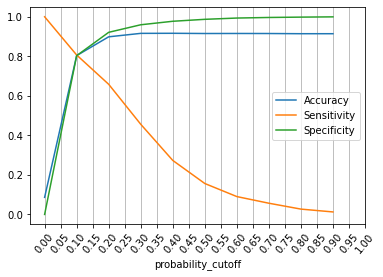

In [63]:
# Call function
y_pred_df = opti_cutoff(y_tr, y_tr_pred_proba)

# Output of the above function call will give threshold probability from the Accuracy-Sensitivity-Specificity trade-off plot

#### From the curve, (0.09-0.1) lies the optimum point, so 0.095 is taken as threshold probability based 'Sensitivity-Specificity' tradeoff

In [64]:
# Getting the 'y_pred_df.predicted' using threshold probability value

opti_prob = 0.095   # Get it from Accuracy-Sensitivity-Specificity trade-off plot
y_pred_df['predicted'] = y_pred_df.predicted_prob.apply( lambda x: 1 if x > opti_prob else 0) 

In [65]:
# Gives detailed classification report
model_report(y_tr, y_pred_df.predicted)

confusion matrix: 
 [[15213  3979]
 [  339  1476]]

Accuracy =  79.4449
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    81.3223
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    79.2674
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  27.0577
Recall =  81.3223
F1 Score =  40.6052

All metrics measured in terms of %


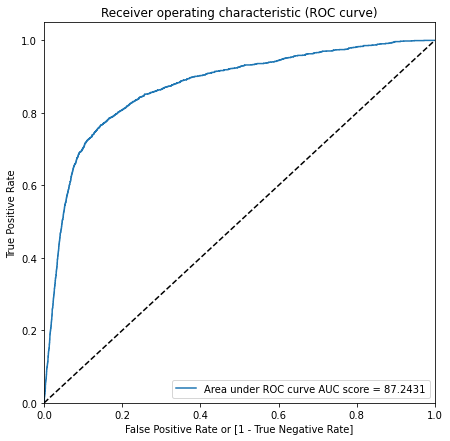

In [66]:
# Gives ROC curve
fn_roc_curve(y_tr, y_pred_df.predicted_prob)

#### Evaluation on test dataset

In [67]:
X_te_LogReg = X_te[col]
X_te_sm = sm.add_constant(X_te_LogReg)

# Getting the Predicted values on the test dataset
y_te_pred_proba = logm1.predict(X_te_sm).values.reshape(-1)

   probability_cutoff  Accuracy  Sensitivity  Specificity
0                 0.0  0.086406     1.000000     0.000000
1                 0.1  0.795313     0.785347     0.796256
2                 0.2  0.892492     0.631105     0.917214
3                 0.3  0.916926     0.479434     0.958303
4                 0.4  0.917814     0.303342     0.975930
5                 0.5  0.918036     0.191517     0.986749
6                 0.6  0.916704     0.123393     0.991734
7                 0.7  0.916926     0.083548     0.995745
8                 0.8  0.916037     0.052699     0.997690
9                 0.9  0.914482     0.011568     0.999878


<Figure size 864x576 with 0 Axes>

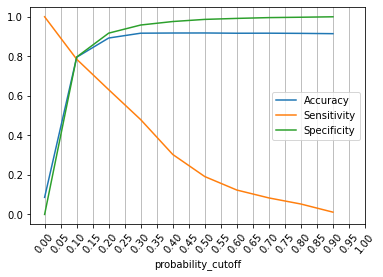

In [68]:
# Call function
y_pred_df = opti_cutoff(y_te, y_te_pred_proba)

# Output of the above function call will give threshold probability from the Accuracy-Sensitivity-Specificity trade-off plot

#### From the curve, (0.09-0.1) lies the optimum point, so 0.095 is taken as threshold probability based 'Sensitivity-Specificity' tradeoff

In [69]:
# Getting the 'y_pred_df.predicted' using threshold probability value

opti_prob = 0.095   # Get it from Accuracy-Sensitivity-Specificity trade-off plot
y_pred_df['predicted'] = y_pred_df.predicted_prob.apply( lambda x: 1 if x > opti_prob else 0) 

In [70]:
# Gives detailed classification report
model_report(y_te, y_pred_df.predicted)

confusion matrix: 
 [[6451 1775]
 [ 165  613]]

Accuracy =  78.454
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    78.7918
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    78.4221
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  25.67
Recall =  78.7918
F1 Score =  38.7239

All metrics measured in terms of %


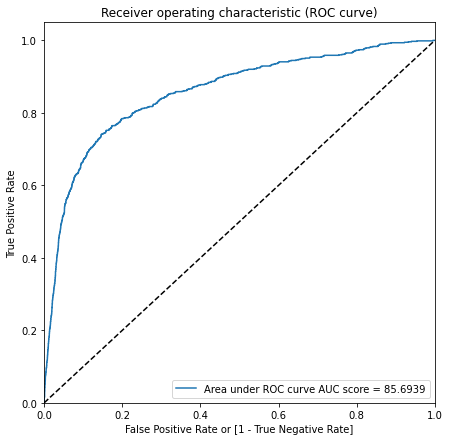

In [71]:
# Gives ROC curve
fn_roc_curve(y_te, y_pred_df.predicted_prob)

### Random forest with RFE 

#### Feature elimination using RFECV

In [72]:
# Creating an object for logistic regression

logreg = LogisticRegression(class_weight='balanced') # // class_weight='balanced' \\ is to handle class imbalance in the dataset

In [73]:
rfecv = RFECV(estimator=logreg, cv=5, n_jobs=-1)
rfecv.fit(X_tr, y_tr)

RFECV(cv=5, estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1)

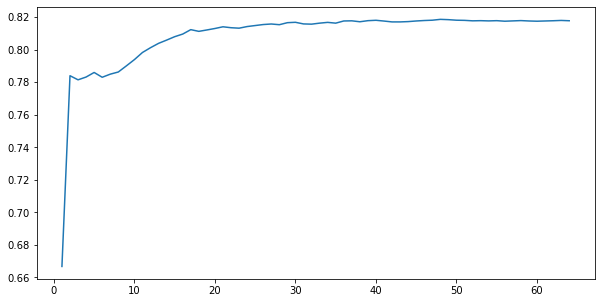

In [74]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_tr.shape[1]+1), rfecv.grid_scores_)
plt.show()

#### Number of features selected by RFECV

In [75]:
rfecv.n_features_

48

In [76]:
# Assigning RFE supported columns to new dataframe

col_rfecv = X_tr.columns[rfecv.support_]
X_tr_rfecv = X_tr[col_rfecv]

In [77]:
# Random Forest

params = {
          'max_depth': [3, 5, 10, 15, 20],
          'min_samples_leaf': [5, 10, 25, 50, 100, 300],
          'n_estimators': [10, 25, 50, 75, 100],
          'criterion': ["gini"]
         }

strat_cv = StratifiedKFold( n_splits=6, shuffle=True, random_state=40 )

rf_rfecv_gscv = GridSearchCV(
                    estimator = RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid = params,
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

rf_rfecv_gscv_res = rf_rfecv_gscv.fit(X_tr_rfecv, y_tr)
rf_rfecv_best_esti = rf_rfecv_gscv_res.best_estimator_
print(rf_rfecv_best_esti)

Fitting 6 folds for each of 150 candidates, totalling 900 fits
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, n_estimators=75, random_state=42)


In [78]:
# Getting the Predicted values on the train dataset
y_tr_pred_probblty = rf_rfecv_best_esti.predict_proba(X_tr_rfecv)[:,1]#.values.reshape(-1)
y_tr_predict = rf_rfecv_best_esti.predict(X_tr_rfecv)

# Getting X_test df
X_te_rfecv = X_te[col_rfecv]

# Getting the Predicted values on the test dataset
y_te_pred_probblty = rf_rfecv_best_esti.predict_proba(X_te_rfecv)[:,1]#.values.reshape(-1)
y_te_predict = rf_rfecv_best_esti.predict(X_te_rfecv)

#### Evaluation on train dataset

In [79]:
# Gives detailed classification report
model_report(y_tr, y_tr_predict)

confusion matrix: 
 [[18631   561]
 [   63  1752]]

Accuracy =  97.0296
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    96.5289
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    97.0769
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  75.7458
Recall =  96.5289
F1 Score =  84.8837

All metrics measured in terms of %


#### Evaluation on test dataset

In [80]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[7920  306]
 [ 308  470]]

Accuracy =  93.1808
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    60.4113
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    96.2801
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  60.567
Recall =  60.4113
F1 Score =  60.4891

All metrics measured in terms of %


#### ROC curve on train data

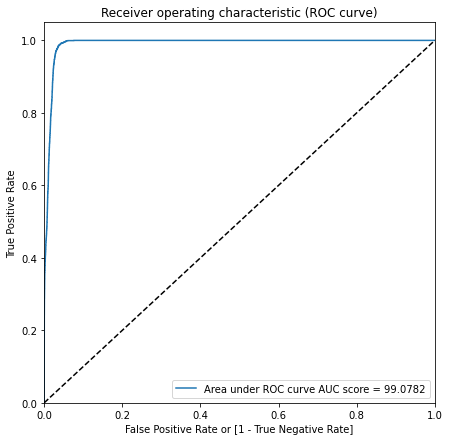

In [81]:
# Gives ROC curve
fn_roc_curve(y_tr, y_tr_pred_probblty)

#### ROC curve on test data

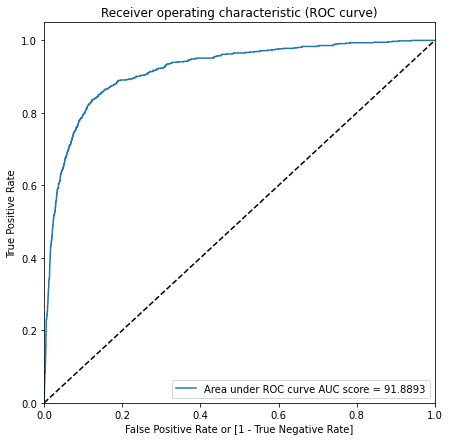

In [82]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

### Feature Importance

Top 10 features by importance are:



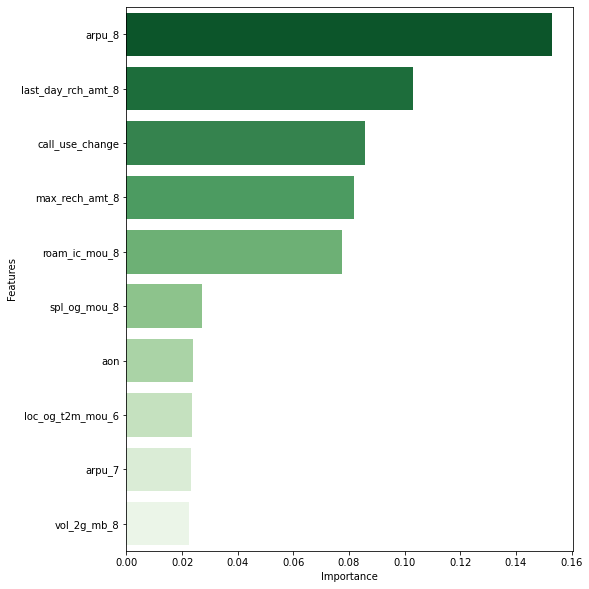

In [83]:
imp_df = pd.DataFrame({
                        "Features": X_tr_rfecv.columns,
                        "Importance": rf_rfecv_best_esti.feature_importances_
                      })

print('Top 10 features by importance are:\n')
top10_df = imp_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,10))
sns.barplot(x="Importance", y="Features", data= top10_df, palette = "Greens_r")
plt.show()

### Model building with PCA

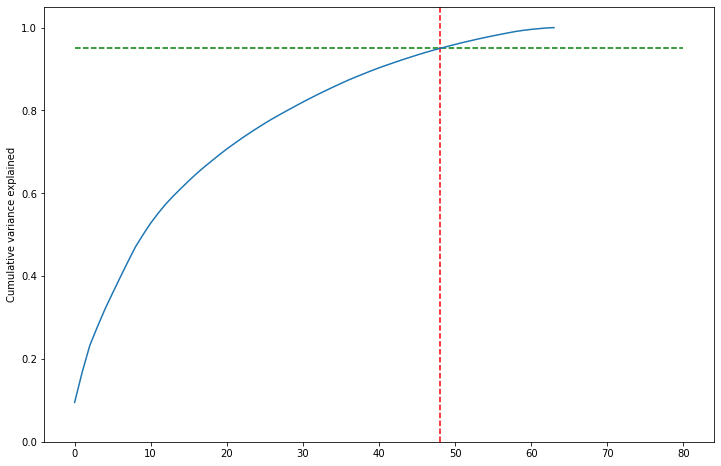

In [84]:
modelpca = PCA(random_state=42)
pca = modelpca.fit(X_tr)

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=48, ymax=1.05, ymin=0, colors="r", linestyles="--")
plt.ylim([0,1.05])
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### 48 features explain 95% of  variance, hence 'n_components' is taken as 48

In [85]:
pca_final = IncrementalPCA(n_components=48)
pca_train = pca_final.fit_transform(X_tr)

df_train_pca = pd.DataFrame(pca_train)
df_train_pca.head()

0         1         2         3         4         5         6   \
0 -0.272284  2.213743  0.269373  0.574586 -2.538806  4.937737 -1.622095   
1 -2.112292 -0.825545  0.916183 -0.340554 -1.033330  2.163280  2.080722   
2  1.616780 -1.774994 -1.000656 -0.282013  0.273649  0.541246 -0.555390   
3 -2.233614  9.470916 -1.077816  0.657323 -1.035155 -6.645726  1.517739   
4 -0.417195 -1.688463  0.338381  0.715018 -1.450442  1.194146  0.197596   

         7         8         9         10        11        12        13  \
0 -1.376730 -0.332540 -3.106205  0.623882  0.843773  0.241171 -0.618899   
1  0.943751  1.419063  1.576869 -1.625000 -0.161453 -1.683692  0.214462   
2 -0.551719  1.779639 -0.375291  0.032008  0.036974  0.001235  0.016976   
3  3.445847  3.887670 -0.871671  0.063105 -0.285502  0.042564  0.564744   
4  1.742336 -1.285884 -0.722258  1.594418 -3.644180  3.703290 -0.410590   

         14        15        16        17        18        19        20  \
0 -1.873122 -0.062175 -1.589973 -3.542227  0.023539  1.380885 -0.246845   
1 -0.187057  0.421569  0.321753 -0.525353 -0.065041 -0.199844  1.010456   
2  0.859800  1.059251 -0.047030 -0.146435  0.219036  0.267127  0.663087   
3 -0.344852  0.025458 -1.444749 -0.152146 -1.375545 -1.372052 -0.008401   
4  0.728678 -1.355423 -0.807104  0.911018 -0.169744  0.635237  0.602438   

         21        22        23        24        25        26        27  \
0 -2.833223  0.393070 -0.786577 -1.783144  2.009687  0.080769 -0.884334   
1  0.093841 -0.234045 -0.031705  0.289677 -0.346415  0.134701  0.370578   
2 -1.338155  1.258760 -0.876392 -0.378842  0.971290  0.070414 -0.993928   
3 -0.341577  0.036270  0.634210  0.297319  0.086519 -0.232492  0.029366   
4  0.139951  1.768890  0.024088 -2.119455 -0.370287  0.633432  0.081837   

         28        29        30        31        32        33        34  \
0  0.473153 -1.179506  0.139413 -1.858642 -1.896690 -0.041686  1.705437   
1  0.223329  0.041934 -0.301412  0.183804 -0.257853  0.481079 -0.077056   
2  0.004303  0.228658 -0.832444  0.438931  0.203819 -0.469588 -0.085713   
3 -0.225750  0.324565 -0.064644 -0.001922 -0.461516  0.462650  0.553169   
4 -1.853053  0.492383  0.010879 -0.514887 -0.207081  0.348670  0.556411   

         35        36        37        38        39        40        41  \
0  0.048222  0.144447  1.431677 -0.393639 -0.413046 -2.906538 -0.847622   
1  0.202630 -0.296370  0.038360 -0.440280 -0.295479  0.156338  0.034435   
2 -0.146200 -0.091704 -0.460850 -0.073490 -0.213698  0.421683 -0.076347   
3 -0.421277  0.346745 -0.506481 -0.044786 -0.275615  0.316671  0.268542   
4  0.196574  0.317749  0.001847 -0.103865  0.439875 -0.207675 -0.055368   

         42        43        44        45        46        47  
0 -0.452150 -0.152818 -1.162688  0.177227 -0.037257  0.165317  
1 -0.083472  0.187984 -0.119521  0.018036 -0.067006  0.141165  
2  0.193338  0.143278 -0.710443 -0.236064  0.172858  0.021483  
3 -0.237768  0.471821 -0.521962 -0.456267 -0.153300 -0.390174  
4  0.398439 -0.705825 -0.369724  0.235871  0.023883 -0.518837

In [86]:
pca_test = pca_final.transform(X_te)

df_test_pca = pd.DataFrame(pca_test)
df_test_pca.shape

(9004, 48)

<AxesSubplot:>

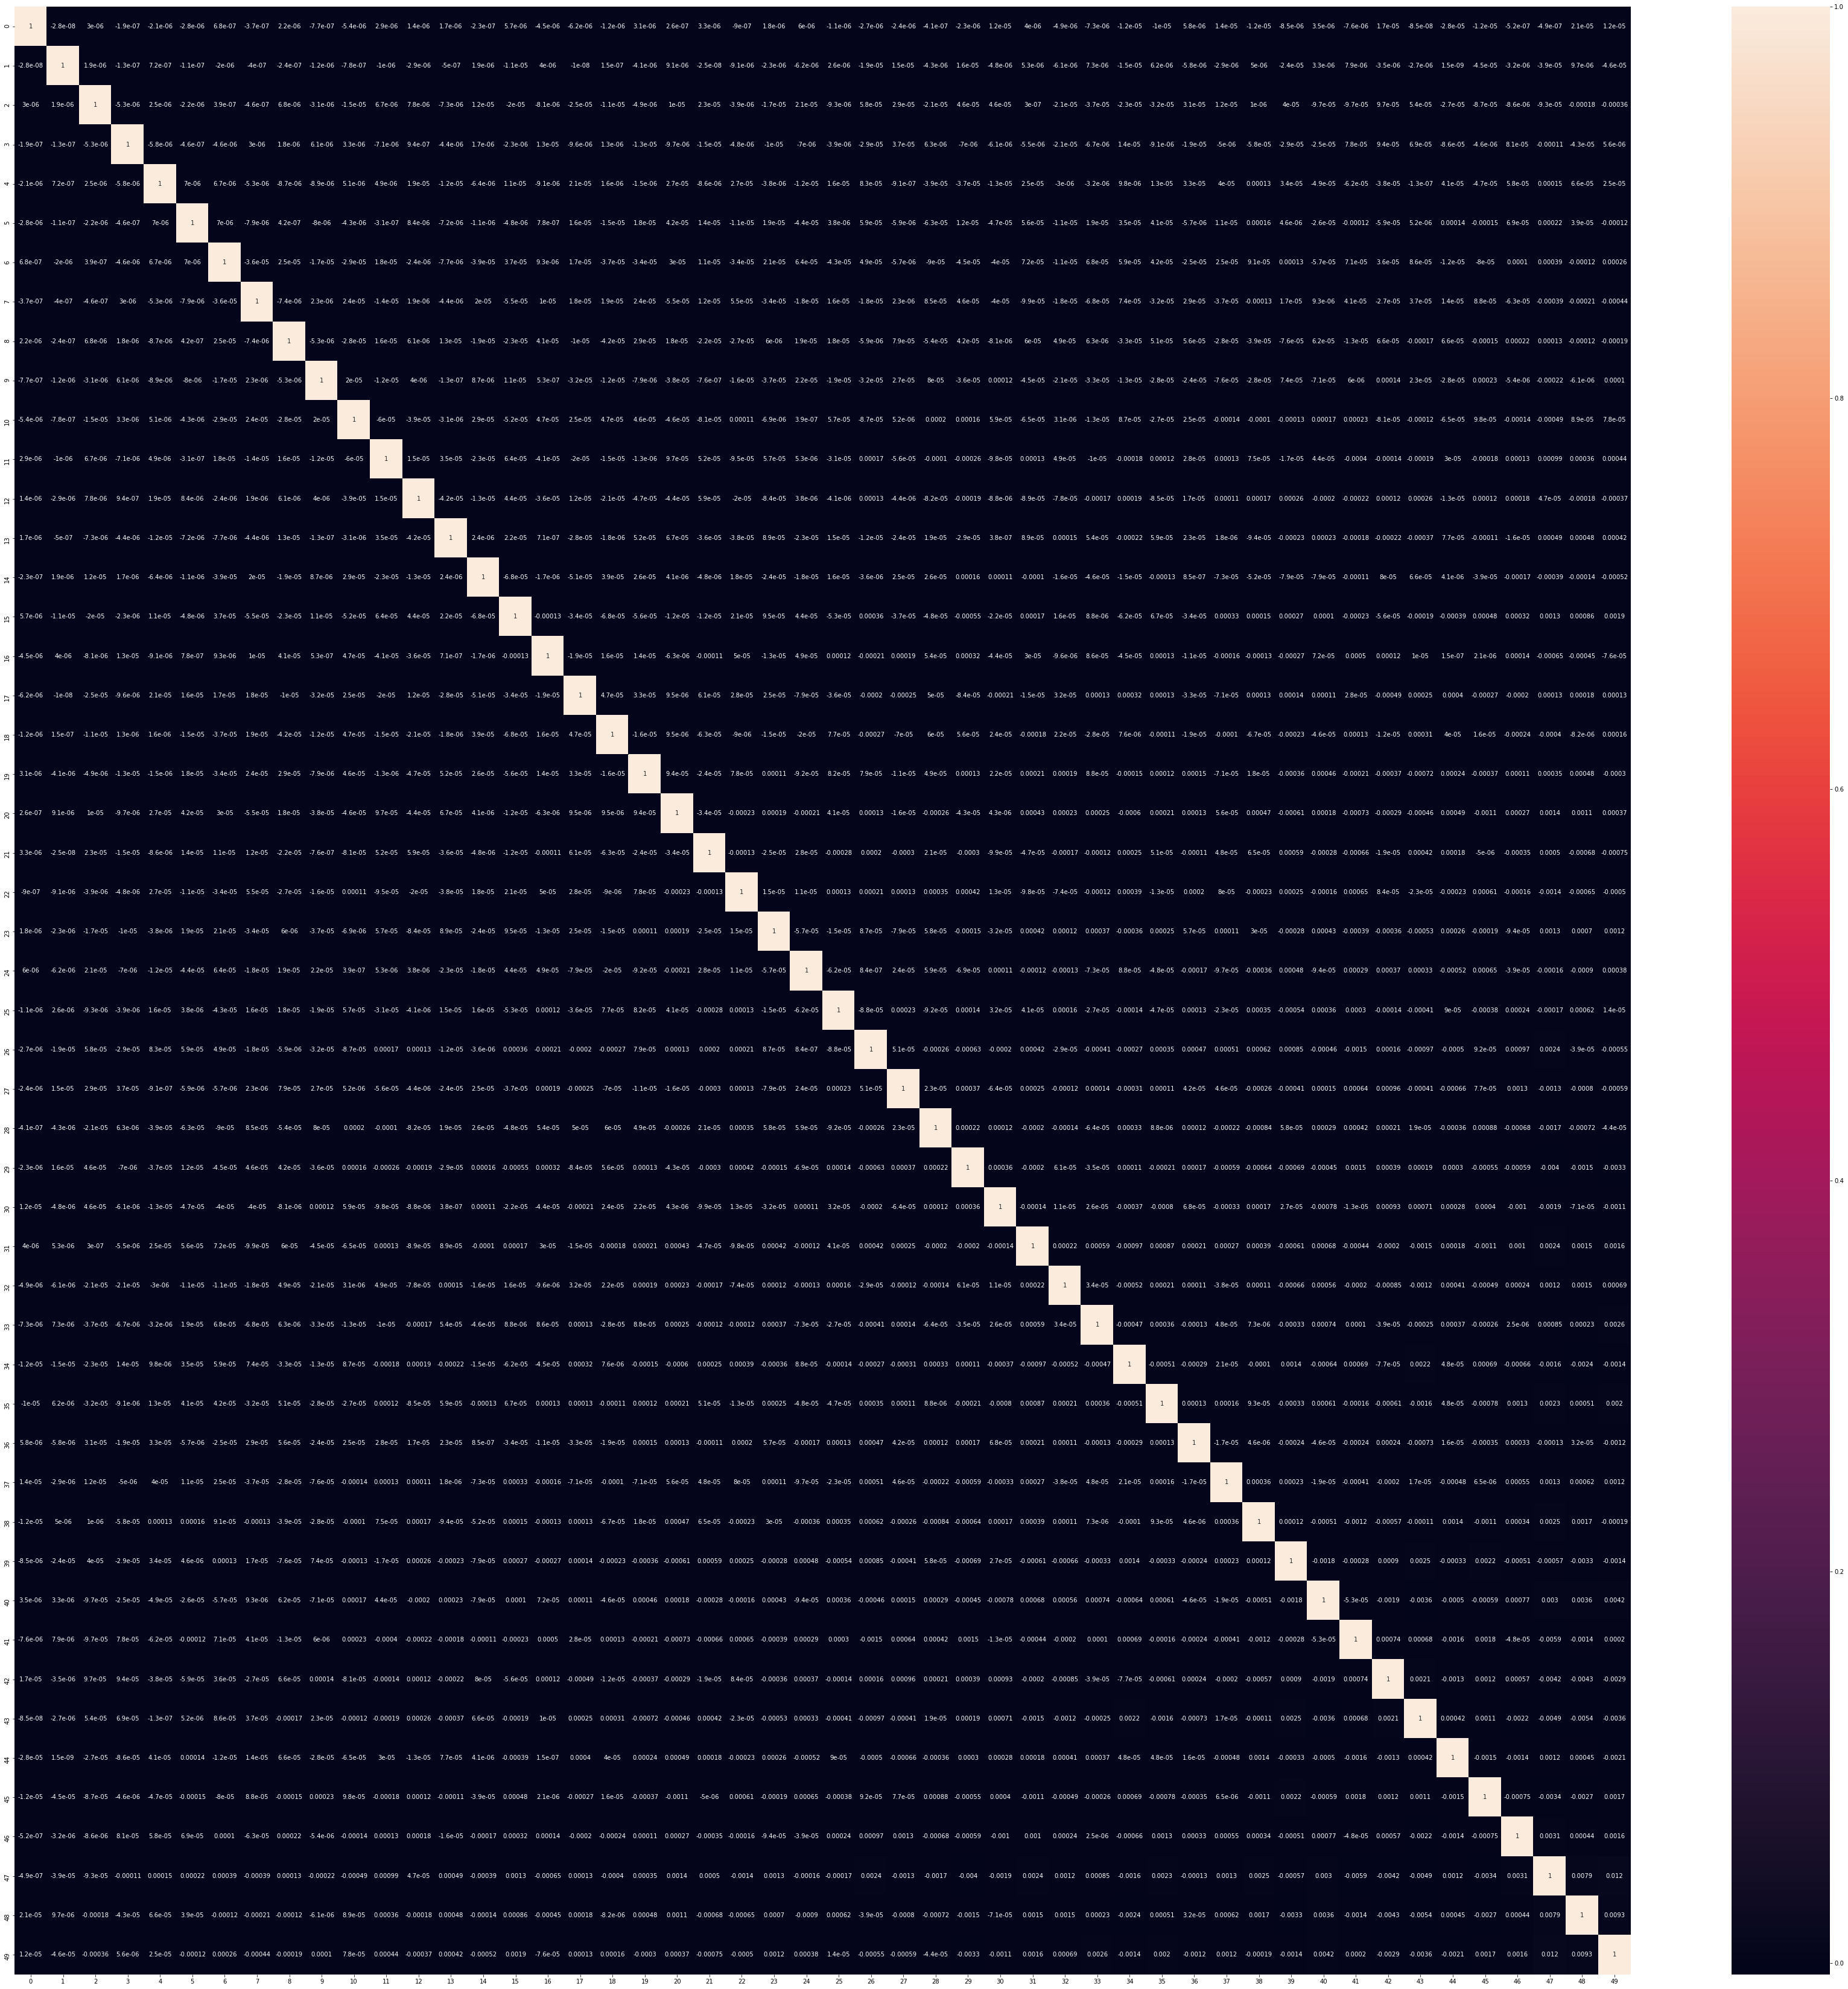

In [77]:
corrmat = np.corrcoef(df_train_pca.transpose())

plt.figure(figsize=[60,60])
sns.heatmap(corrmat, annot=True)

#### Comments:
No multicollinearity effects found between principal components

#### Logistic regression on PCA data using ( class_weight='balanced' ) method for treating class imbalance

In [87]:
lm = LogisticRegression(class_weight='balanced')   # // class_weight='balanced' \\ is to handle class imbalance in the dataset
lr = lm.fit(df_train_pca, y_tr)

#### Evaluation on test dataset

In [88]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = lr.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = lr.predict(df_test_pca)

In [89]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[6660 1566]
 [ 146  632]]

Accuracy =  80.9862
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    81.2339
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    80.9628
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  28.7534
Recall =  81.2339
F1 Score =  42.4731

All metrics measured in terms of %


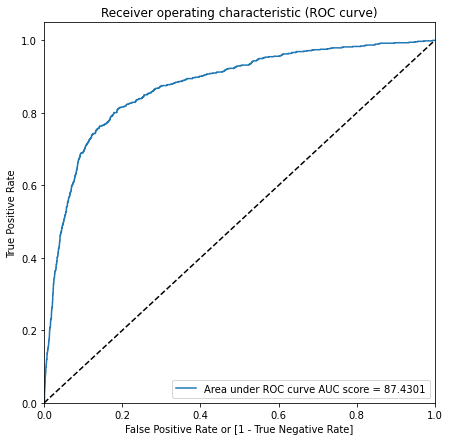

In [90]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

#### Logistic regression on PCA data using ( class_weight='balanced' ) method for treating class imbalance and with hyperparameter tuning

In [91]:
wght = np.linspace(0,1,21)
gscv = GridSearchCV(
                    estimator = LogisticRegression(),
                    param_grid = {'class_weight': [{0: x, 1: 1.0-x} for x in wght]},
                    scoring = 'f1',
                    cv = 5
                    )
gscv_res = gscv.fit(df_train_pca, y_tr)
print('Best parameters: ', gscv_res.best_params_)

Best parameters:  {'class_weight': {0: 0.25, 1: 0.75}}


    Mean F1-score  weight
0        0.159057    0.00
1        0.347592    0.05
2        0.458088    0.10
3        0.516699    0.15
4        0.527990    0.20
5        0.531261    0.25
6        0.514225    0.30
7        0.491431    0.35
8        0.455673    0.40
9        0.402217    0.45
10       0.336174    0.50
11       0.278556    0.55
12       0.223830    0.60
13       0.176933    0.65
14       0.121910    0.70
15       0.081760    0.75
16       0.057400    0.80
17       0.030239    0.85
18       0.004384    0.90
19       0.000000    0.95
20       0.000000    1.00


<Figure size 1080x576 with 0 Axes>

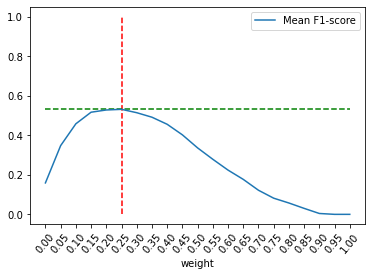

Maximum value of mean F1-score = 0.5313 
Corresponding weight = 0.2500


In [92]:
# Getting the optimal 'class_weight'

score_wght_df = pd.DataFrame({'Mean F1-score': gscv_res.cv_results_['mean_test_score'], 'weight': wght })                      
print(score_wght_df)

plt.figure(figsize = [15,8])
score_wght_df.plot(x='weight')

opt_wght = score_wght_df[score_wght_df['Mean F1-score'] == score_wght_df['Mean F1-score'].max()].weight
max_f1_scor = score_wght_df[score_wght_df['Mean F1-score'] == score_wght_df['Mean F1-score'].max()]['Mean F1-score']

plt.vlines(x = opt_wght, ymax = 1.0, ymin = 0, colors = "r", linestyles = "--")
plt.hlines(y = max_f1_scor, xmax = 1.0, xmin = 0, colors="g", linestyles="--")
plt.xticks(wght, rotation=50)
plt.show()

print('Maximum value of mean F1-score = %0.4f \nCorresponding weight = %0.4f'%(max_f1_scor,opt_wght))

In [93]:
gscv_LogReg_best_res = LogisticRegression(**gscv_res.best_params_).fit(df_train_pca, y_tr)

#### Evaluation on test dataset

In [94]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = gscv_LogReg_best_res.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = gscv_LogReg_best_res.predict(df_test_pca)

In [95]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[7738  488]
 [ 326  452]]

Accuracy =  90.9596
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    58.0977
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    94.0676
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  48.0851
Recall =  58.0977
F1 Score =  52.6193

All metrics measured in terms of %


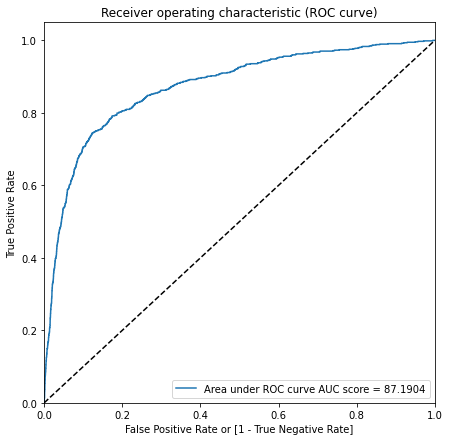

In [96]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

#### Logistic regression on PCA data using SMOTE method for treating class imbalance 

In [97]:
smt = SMOTE(sampling_strategy=0.5,random_state=42)
x_tr_smote, y_tr_smote = smt.fit_resample(df_train_pca, y_tr)

In [98]:
smote_LogReg = LogisticRegression().fit(x_tr_smote, y_tr_smote)

#### Evaluation on test dataset

In [99]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = smote_LogReg.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = smote_LogReg.predict(df_test_pca)

In [100]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[7407  819]
 [ 238  540]]

Accuracy =  88.2608
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    69.4087
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    90.0438
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  39.7351
Recall =  69.4087
F1 Score =  50.5381

All metrics measured in terms of %


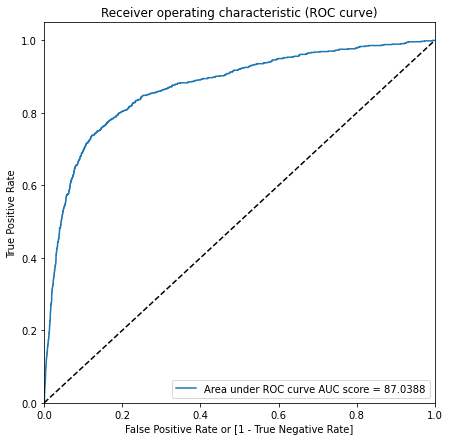

In [101]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

#### Logistic regression on PCA data using SMOTE method for treating class imbalance and with hyperparameter tuning

In [102]:
sm_wght = np.linspace(0,1,41)

smt = SMOTE(sampling_strategy=0.5,random_state=42)
x_tr_smote, y_tr_smote = smt.fit_resample(df_train_pca, y_tr)

strat_cv = StratifiedKFold( n_splits=10, shuffle=True, random_state=40 )

smt_gscv = GridSearchCV(
                    estimator = LogisticRegression(),
                    param_grid = {'C': sm_wght},
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

smt_gscv_res = smt_gscv.fit(x_tr_smote, y_tr_smote)
print('Best parameters: ', smt_gscv_res.best_params_)

Fitting 10 folds for each of 41 candidates, totalling 410 fits
Best parameters:  {'C': 0.9}


    Mean F1-score  weight
0             NaN   0.000
1        0.775243   0.025
2        0.775087   0.050
3        0.775070   0.075
4        0.775266   0.100
5        0.775143   0.125
6        0.775167   0.150
7        0.775167   0.175
8        0.775167   0.200
9        0.775167   0.225
10       0.775167   0.250
11       0.775233   0.275
12       0.775193   0.300
13       0.775193   0.325
14       0.775193   0.350
15       0.775193   0.375
16       0.775258   0.400
17       0.775323   0.425
18       0.775323   0.450
19       0.775323   0.475


<Figure size 1080x576 with 0 Axes>

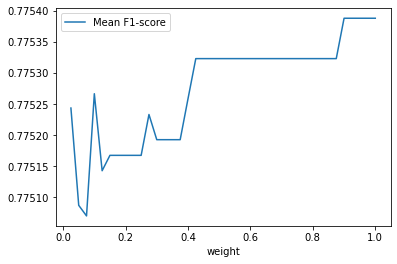

    Mean F1-score  weight
36       0.775388   0.900
37       0.775388   0.925
38       0.775388   0.950
39       0.775388   0.975
40       0.775388   1.000


In [103]:
# Getting the optimal 'class_weight'

score_wght_df = pd.DataFrame({'Mean F1-score': smt_gscv_res.cv_results_['mean_test_score'], 'weight': sm_wght })                      
print(score_wght_df.head(20))

plt.figure(figsize = [15,8])
score_wght_df.plot(x='weight')
plt.show()

max_f1_scor = score_wght_df[score_wght_df['Mean F1-score'] == score_wght_df['Mean F1-score'].max()]
print(max_f1_scor)

In [104]:
smt_gscv_LogReg_best_res = LogisticRegression(**smt_gscv_res.best_params_).fit(x_tr_smote, y_tr_smote)

#### Evaluation on test dataset

In [105]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = smt_gscv_LogReg_best_res.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = smt_gscv_LogReg_best_res.predict(df_test_pca)

In [106]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[7407  819]
 [ 238  540]]

Accuracy =  88.2608
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    69.4087
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    90.0438
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  39.7351
Recall =  69.4087
F1 Score =  50.5381

All metrics measured in terms of %


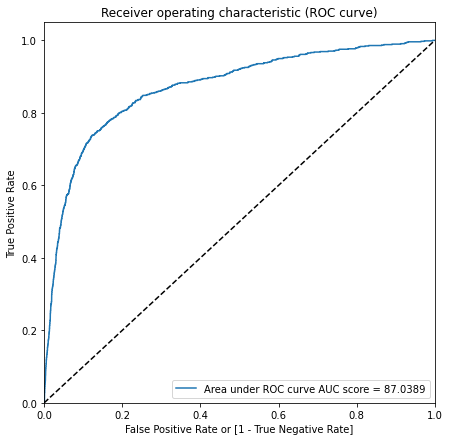

In [107]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

### Decision Tree

In [108]:
# Decision tree

params = {
          'max_depth': [3, 5, 10, 15, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'criterion': ["gini", "entropy"]
         }

strat_cv = StratifiedKFold( n_splits=10, shuffle=True, random_state=40 )

dt_gscv = GridSearchCV(
                    estimator = DecisionTreeClassifier(class_weight='balanced', random_state=42),
                    param_grid = params,
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

dt_gscv_res = dt_gscv.fit(df_train_pca, y_tr)
dt_best_esti = dt_gscv_res.best_estimator_
print(dt_best_esti)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=42)


#### Evaluation on test dataset

In [109]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = dt_best_esti.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = dt_best_esti.predict(df_test_pca)

In [110]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[6832 1394]
 [ 255  523]]

Accuracy =  81.6859
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    67.2237
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    83.0537
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  27.2822
Recall =  67.2237
F1 Score =  38.8126

All metrics measured in terms of %


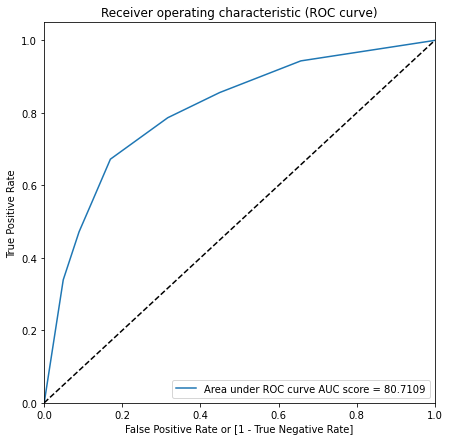

In [111]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

### Random forest

In [112]:
# Random Forest

params = {
          'max_depth': [3, 5, 10, 15, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'n_estimators': [10, 25, 50, 100],
          'criterion': ["entropy"]
         }

strat_cv = StratifiedKFold( n_splits=10, shuffle=True, random_state=40 )

rf_gscv = GridSearchCV(
                    estimator = RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid = params,
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

rf_gscv_res = rf_gscv.fit(df_train_pca, y_tr)
rf_best_esti = rf_gscv_res.best_estimator_
print(rf_best_esti)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=20, random_state=42)


#### Evaluation on test dataset

In [113]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = rf_best_esti.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = rf_best_esti.predict(df_test_pca)

In [114]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[7570  656]
 [ 283  495]]

Accuracy =  89.5713
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    63.6247
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    92.0253
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  43.0061
Recall =  63.6247
F1 Score =  51.3219

All metrics measured in terms of %


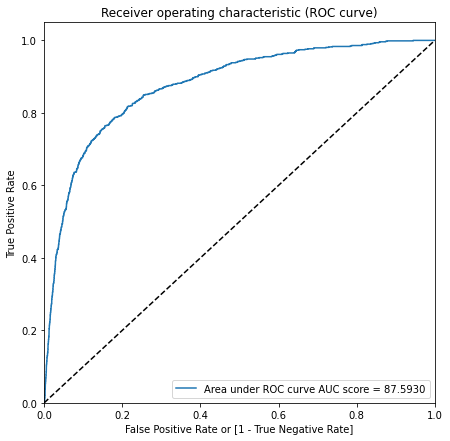

In [115]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

### Gradient Boosting Method

In [116]:
# Tuning 'n_estimators' initially in order to reduce the running time with other hyperparameters 

params = {"n_estimators":range(20,101,10)}

strat_cv = StratifiedKFold( n_splits=10, shuffle=True, random_state=40 )

gbmn_gscv = GridSearchCV(
                    estimator = GradientBoostingClassifier(max_features = 20,learning_rate = 0.1,max_depth = 5,random_state = 45),
                    param_grid = params,
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

gbmn_gscv_res = gbmn_gscv.fit(df_train_pca, y_tr)
gbmn_best_esti = gbmn_gscv_res.best_estimator_
print(gbmn_best_esti)


Fitting 10 folds for each of 9 candidates, totalling 90 fits
GradientBoostingClassifier(max_depth=5, max_features=20, random_state=45)


In [117]:
print(gbmn_gscv_res.best_params_) # This best 'n_estimators' will be taken for further tuning

{'n_estimators': 100}


In [118]:
# Hyperparameter tuning

params = {'max_depth': [3, 5, 10, 15, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100]}

strat_cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=40 )

gbm_gscv = GridSearchCV(
                    estimator = GradientBoostingClassifier(n_estimators = 100,learning_rate = 0.1,random_state = 45),
                    param_grid = params,
                    scoring = 'f1',
                    cv = strat_cv,
                    n_jobs=-1, verbose=1
                    )

gbm_gscv_res = gbm_gscv.fit(df_train_pca, y_tr)
gbm_best_esti = gbm_gscv_res.best_estimator_
print(gbm_best_esti)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
GradientBoostingClassifier(max_depth=15, min_samples_leaf=100, random_state=45)


#### Evaluation on test dataset

In [119]:
# Getting the Predicted values on the test dataset
y_te_pred_probblty = gbm_best_esti.predict_proba(df_test_pca)[:,1]#.values.reshape(-1)
y_te_predict = gbm_best_esti.predict(df_test_pca)

In [120]:
# Gives detailed classification report
model_report(y_te, y_te_predict)

confusion matrix: 
 [[8069  157]
 [ 527  251]]

Accuracy =  92.4034
Accuracy is indicating the ratio of correct predictions to the total number of predictions

Sensitivity:    32.2622
Sensitivity is indicating the ratio of correctly predicted churn cases to the total churn cases

Specificity:    98.0914
Specificity is indicating the ratio of correctly predicted non-churn prospects to the total non-churn cases

Precision =  61.5196
Recall =  32.2622
F1 Score =  42.3272

All metrics measured in terms of %


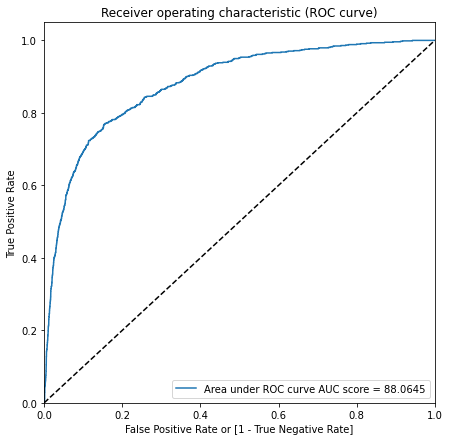

In [121]:
# Gives ROC curve
fn_roc_curve(y_te, y_te_pred_probblty)

## Conclusions
#### All the necessary objectives has been satisfied. 

### Results

#### As the data is having class imbalance and the focus is on predicting the churn customers as accurately as possible, 'F1-score' is considered as metric for comparison between different models. 
#### Also evaluation is focussed on results obtained by the model on test data set, while the test-train comparison is also done for a couple of models
#### Model                                                                                                                            Test F1-score
##### 1. Logistic Regression with RFE   ----------------------------------------------------------------------->     38.72
##### 2. Random Forest with RFECV  --------------------------------------------------------------------------->    60.49    <---  Best score
##### 3. Logistic Regression on PCA data  -------------------------------------------------------------------->    42.47
##### 4. Logistic Regression on PCA data with Hyperparameter Tuning  --------------------------->    52.62
##### 5. Logistic Regression on PCA data using SMOTE for class imbalance  ------------------->     50.54
##### 6. Decision Tree on PCA data  ----------------------------------------------------------------------------->     38.81 
##### 7. Random Forest on PCA data  --------------------------------------------------------------------------->     51.32
##### 8. Gradient Boosting Method on PCA data  ----------------------------------------------------------->      42.33

### Observations
###### - Random forest with RFECV gave the best results with least difference between train and test dataset
###### - One of the derived variable 'call_use_change'  indicating decreasing trend in call usage from good phase to action phase was found to have a significant say in predicting the churn, as evident from the feature importance plot
###### - Special offers on roaming and data usage might help in retaining the churn customers
###### - Improving the network connectivity forms an omportant basis to retain the customers 